In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import sys, getopt

# Dark Neutrino and MC stuff
from dark_news import *

In file included from /Users/matheushostert/.pyxbld/temp.macosx-12-x86_64-cpython-39/pyrex/dark_news/Cfourvec.c:687:
In file included from /usr/local/lib/python3.9/site-packages/numpy/core/include/numpy/arrayobject.h:5:
In file included from /usr/local/lib/python3.9/site-packages/numpy/core/include/numpy/ndarrayobject.h:12:
In file included from /usr/local/lib/python3.9/site-packages/numpy/core/include/numpy/ndarraytypes.h:1960:
/usr/local/lib/python3.9/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: "Using deprecated NumPy API, disable it with "          "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-W#warnings]
#warning "Using deprecated NumPy API, disable it with " \
 ^
1 warning generated.
In file included from /Users/matheushostert/.pyxbld/temp.macosx-12-x86_64-cpython-39/pyrex/dark_news/C_MC.c:687:
In file included from /usr/local/lib/python3.9/site-packages/numpy/core/include/numpy/arrayobject.h:5:
In file included from /usr/local/lib/python

In [2]:
save_folder = 'fig/0_cross_section_checks/'

## SET MODEL PARAMETERS

In [3]:
# MODEL = const.THREEPLUSONE

# #########################
# # Set BSM parameters
# BSMparams = model.model_params()

# # BP-L1
# BSMparams.gprime = np.sqrt(4*np.pi*1.0/4.0)
# BSMparams.chi = np.sqrt(2e-10/const.alphaQED)/const.cw # epsilon = chi * cW
# BSMparams.Ue4 = 0.0
# BSMparams.Umu4 =  np.sqrt(9e-7) 
# BSMparams.Utau4 = 0.0
# BSMparams.UD4 = 1.0
# BSMparams.m4 = 0.420 # GeV
# BSMparams.Mzprime = 0.030 # GeV
# BSMparams.Dirac = const.MAJORANA

# BSMparams.set_high_level_variables()

In [18]:
MODEL = const.THREEPLUSONE
BSMparams = model.model_params()

BSMparams.gprime = np.sqrt(4*np.pi * 0.4)
BSMparams.chi = np.sqrt(4.6e-4)/const.cw # epsilon = chi * cW
BSMparams.m4 = 0.1
BSMparams.Mzprime = 1.25
BSMparams.Umu4 = np.sqrt(2.2e-7)
BSMparams.Ue4 = 0.0
BSMparams.Utau4 = 0.0
BSMparams.UD4 = 1
BSMparams.D_or_M = 'majorana'

BSMparams.set_high_level_variables()

In [21]:
BSMparams.D_or_M = 'majorana'
print(xsecs.get_sigma_zprime(BSMparams, 1, 12*const.MAVG, 6))

BSMparams.D_or_M = 'dirac'
print(xsecs.get_sigma_zprime(BSMparams, 1, 12*const.MAVG, 6))

3.4133438964922826e-40
4.676249426842469e-42


In [17]:
xsecs.get_sigma_zprime(BSMparams, 1, A*const.MAVG, Z)

1.6444897251723739e-38

/var/folders/my/7j7cn6f92_z66yvbb11lgt2r0000gn/T/ipykernel_18449/1892233957.py:13: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(Z_s, sigma/Z_s**2/(sigma[0]/Z_s[0]**2), label=f'$E_\\nu$ = {E_beam} GeV')


FileNotFoundError: [Errno 2] No such file or directory: 'fig/0_cross_section_checks/coh_xsec_vs_Z_diff_energy.pdf'

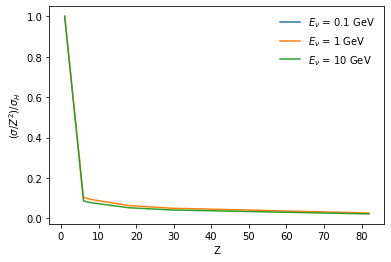

In [6]:
for E_beam in [0.1, 1, 10]:

    A_s = np.array([1, 12, 16, 40, 63.546, 65.38, 207.2])
    Z_s = np.array([1, 6, 8, 18, 29, 30, 82])

    sigma = []

    for A, Z in zip(A_s, Z_s):
        sigma.append(xsecs.get_sigma_zprime(BSMparams, E_beam, A*const.MAVG, Z))

    sigma = np.array(sigma)

    plt.plot(Z_s, sigma/Z_s**2/(sigma[0]/Z_s[0]**2), label=f'$E_\\nu$ = {E_beam} GeV')
plt.xlabel('Z')
plt.ylabel(r'$(\sigma / Z^2) / (\sigma_C / Z_C^2)$')
plt.ylabel(r'$(\sigma / Z^2) / \sigma_H$')
plt.legend(frameon=False)

plt.savefig(save_folder + 'coh_xsec_vs_Z_diff_energy.pdf', bbox_inches='tight')

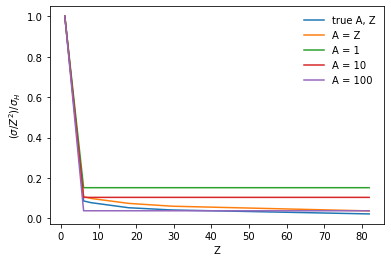

In [17]:
A_s = np.array([1, 12, 16, 40, 63.546, 65.38, 207.2])
Z_s = np.array([1, 6, 8, 18, 29, 30, 82])

sigma = []
for A, Z in zip(A_s, Z_s):
    sigma.append(xsecs.get_sigma_zprime(BSMparams, E_beam, A*const.MAVG, Z))
sigma = np.array(sigma)
plt.plot(Z_s, sigma/Z_s**2/(sigma[0]/Z_s[0]**2), label=f'true A, Z')

sigma = []
for A, Z in zip(A_s, Z_s):
    A = Z
    sigma.append(xsecs.get_sigma_zprime(BSMparams, E_beam, A*const.MAVG, Z))
sigma = np.array(sigma)
plt.plot(Z_s, sigma/Z_s**2/(sigma[0]/Z_s[0]**2), label=f'A = Z')

sigma = []
for A, Z in zip(Z_s, Z_s):
    A = 1
    sigma.append(xsecs.get_sigma_zprime(BSMparams, E_beam, A*const.MAVG, Z))
sigma = np.array(sigma)
plt.plot(Z_s, sigma/Z_s**2/(sigma[0]/Z_s[0]**2), label=f'A = 1')

sigma = []
for A, Z in zip(Z_s, Z_s):
    A = 10
    sigma.append(xsecs.get_sigma_zprime(BSMparams, E_beam, A*const.MAVG, Z))
sigma = np.array(sigma)
plt.plot(Z_s, sigma/Z_s**2/(sigma[0]/Z_s[0]**2), label=f'A = 10')

sigma = []
for A, Z in zip(Z_s, Z_s):
    A = 100
    sigma.append(xsecs.get_sigma_zprime(BSMparams, E_beam, A*const.MAVG, Z))
sigma = np.array(sigma)
plt.plot(Z_s, sigma/Z_s**2/(sigma[0]/Z_s[0]**2), label=f'A = 100')

plt.xlabel('Z')
plt.ylabel(r'$(\sigma / Z^2) / (\sigma_C / Z_C^2)$')
plt.ylabel(r'$(\sigma / Z^2) / \sigma_H$')
plt.legend(frameon=False)

# plt.savefig(save_folder + 'coh_xsec_vs_Z_diff_A.pdf', bbox_inches='tight')

## Check with different $m_N$

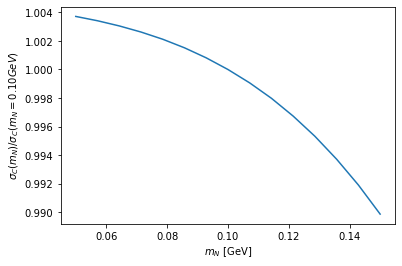

In [85]:
E_beam = 1
A = 12
Z = 6
m_N_s = np.linspace(0.05, 0.15, 15)

sigma = []
for m_N in m_N_s:
    MODEL = const.THREEPLUSONE
    BSMparams = model.model_params()

    BSMparams.gprime = np.sqrt(4*np.pi * 0.4)
    BSMparams.chi = np.sqrt(4.6e-4)/const.cw # epsilon = chi * cW
    BSMparams.m4 = m_N
    BSMparams.Mzprime = 1.25
    BSMparams.Umu4 = np.sqrt(2.2e-7)
    BSMparams.Ue4 = 0.0
    BSMparams.Utau4 = 0.0
    BSMparams.UD4 = 1
    # BSMparams.Dirac = const.MAJORANA
    BSMparams.D_or_M = 'majorana'

    BSMparams.set_high_level_variables()
    
    sigma.append(xsecs.get_sigma_zprime(BSMparams, E_beam, A*const.MAVG, Z))

sigma = np.array(sigma)
plt.plot(m_N_s, sigma/sigma[7])
plt.xlabel(r'$m_N$ [GeV]')
plt.ylabel(f'$\sigma_C(m_N) / \sigma_C(m_N = {m_N_s[7]:.2f} GeV)$')
# plt.yscale('log')

plt.savefig(save_folder + 'coh_xsec_vs_m_N.pdf', bbox_inches='tight')